In [7]:
import mdn
from tensorflow import keras
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Generate Synthetic Data

<IPython.core.display.Javascript object>


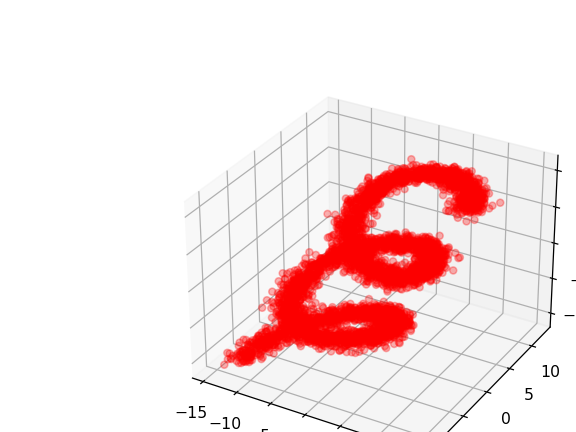

In [8]:
## Generating some data:
NSAMPLE = 5000

z_data = np.float32(np.random.uniform(-10.5, 10.5, NSAMPLE))
r_data = np.random.normal(size=NSAMPLE)
s_data = np.random.normal(size=NSAMPLE)
x_data = np.sin(0.75 * z_data) * 7.0 + z_data * 0.5 + r_data * 1.0
y_data = np.cos(0.80 * z_data) * 6.5 + z_data * 0.5 + s_data * 1.0

x_input = z_data.reshape((NSAMPLE, 1))
y_input = np.array([x_data, y_data])
y_input = y_input.T 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.3, c='r') #c=perf_down_sampled.moving
plt.show()

In [9]:
x_input.shape

(5000, 1)

In [10]:
y_input.shape

(5000, 2)

In [11]:
# ===============
# BUILD THE MODEL
# ===============

N_HIDDEN = 15
N_MIXES = 10
OUTPUT_DIMS = 2

model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, batch_input_shape=(None, 1), activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(mdn.MDN(OUTPUT_DIMS, N_MIXES))
model.compile(loss=mdn.get_mixture_loss_func(OUTPUT_DIMS, N_MIXES), optimizer=keras.optimizers.Adam())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
mdn (MDN)                    (None, 50)                800       
Total params: 1,070
Trainable params: 1,070
Non-trainable params: 0
_________________________________________________________________


In [4]:
# ===============
# TRAIN THE MODEL
# ===============

history = model.fit(x=x_input, y=y_input, batch_size=128, epochs=300,
                    validation_split=0.15, callbacks=[keras.callbacks.TerminateOnNaN()])

Epoch 1/300
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
34/34 [==============================] - 9s 78ms/step - loss: 11.8713 - val_loss: 9.6071
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 9.1407 - val_loss: 7.7635
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 7.5231 - val_loss: 6.9618
Epoch 4/300
34/34 [==============================] - 0s 7ms/step - loss: 6.8357 - val_loss: 6.6747
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 6.5993 - val_loss: 6.5042
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 6.4635 - val_loss: 6.3681
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 6.3671 - val_loss: 6.2680
Epoch 8/300
34/34 [==============================] - 0s 9ms/step - loss: 6.2569 - val_loss: 6.1835
Epoch 9/300
34/34 [==============================] - 0s 5ms/step - loss: 6.1737 - val_loss: 6.1165
Epoch 10/300
34/34 [

34/34 [==============================] - 0s 5ms/step - loss: 3.5343 - val_loss: 3.6126
Epoch 80/300
34/34 [==============================] - 0s 4ms/step - loss: 3.5240 - val_loss: 3.5920
Epoch 81/300
34/34 [==============================] - 0s 4ms/step - loss: 3.5683 - val_loss: 3.5841
Epoch 82/300
34/34 [==============================] - 0s 5ms/step - loss: 3.5135 - val_loss: 3.5776
Epoch 83/300
34/34 [==============================] - 0s 5ms/step - loss: 3.5471 - val_loss: 3.5547
Epoch 84/300
34/34 [==============================] - 0s 6ms/step - loss: 3.4858 - val_loss: 3.5480
Epoch 85/300
34/34 [==============================] - 0s 6ms/step - loss: 3.4947 - val_loss: 3.5437
Epoch 86/300
34/34 [==============================] - 0s 7ms/step - loss: 3.4977 - val_loss: 3.5385
Epoch 87/300
34/34 [==============================] - 0s 6ms/step - loss: 3.4845 - val_loss: 3.5235
Epoch 88/300
34/34 [==============================] - 0s 9ms/step - loss: 3.4733 - val_loss: 3.5133
Epoch 89/300


34/34 [==============================] - 0s 5ms/step - loss: 3.0203 - val_loss: 3.0594
Epoch 242/300
34/34 [==============================] - 0s 4ms/step - loss: 3.0172 - val_loss: 3.0406
Epoch 243/300
34/34 [==============================] - 0s 5ms/step - loss: 2.9960 - val_loss: 3.0415
Epoch 244/300
34/34 [==============================] - 0s 5ms/step - loss: 3.0131 - val_loss: 3.0351
Epoch 245/300
34/34 [==============================] - 0s 5ms/step - loss: 3.0123 - val_loss: 3.0538
Epoch 246/300
34/34 [==============================] - 0s 4ms/step - loss: 2.9971 - val_loss: 3.0367
Epoch 247/300
34/34 [==============================] - 0s 4ms/step - loss: 3.0198 - val_loss: 3.0666
Epoch 248/300
34/34 [==============================] - 0s 5ms/step - loss: 3.0206 - val_loss: 3.0873
Epoch 249/300
34/34 [==============================] - 0s 4ms/step - loss: 3.0615 - val_loss: 3.0543
Epoch 250/300
34/34 [==============================] - 0s 5ms/step - loss: 3.0052 - val_loss: 3.0617
Epoc

<IPython.core.display.Javascript object>


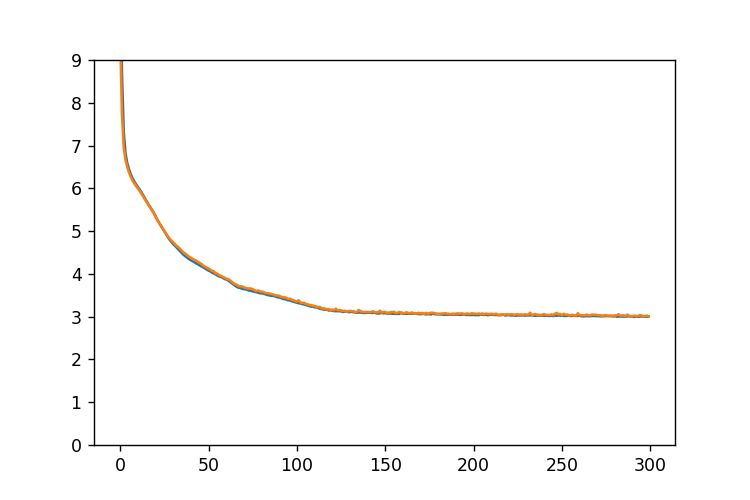

In [5]:
# =============
# PLOT THE LOSS
# =============

plt.figure(figsize=(6, 4))
plt.ylim([0,9])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Try out the MDN Model

Now we try out the model by making predictions at 3000 evenly spaced points on the x-axis. 

Mixture models output lists of parameters, so we're going to sample from these parameters for each point on the x-axis, and also try plotting the parameters themselves so we can have some insight into what the model is learning!

In [6]:
# ================
# MAKE PREDICTIONS
# ================

x_test = np.float32(np.arange(-15, 15, 0.01))
x_test = x_test.reshape(x_test.size, 1) 
y_test = model.predict(x_test)

# Split up the mixture parameters (for future fun)
mus = np.apply_along_axis((lambda a: a[:N_MIXES*OUTPUT_DIMS]), 1, y_test)
sigs = np.apply_along_axis((lambda a: a[N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]), 1, y_test)
pis = np.apply_along_axis((lambda a: mdn.softmax(a[-N_MIXES:])), 1, y_test)

<IPython.core.display.Javascript object>


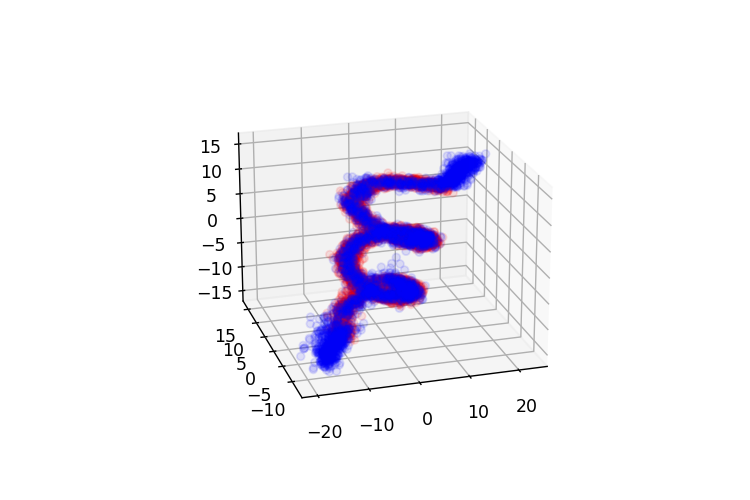

<IPython.core.display.Javascript object>


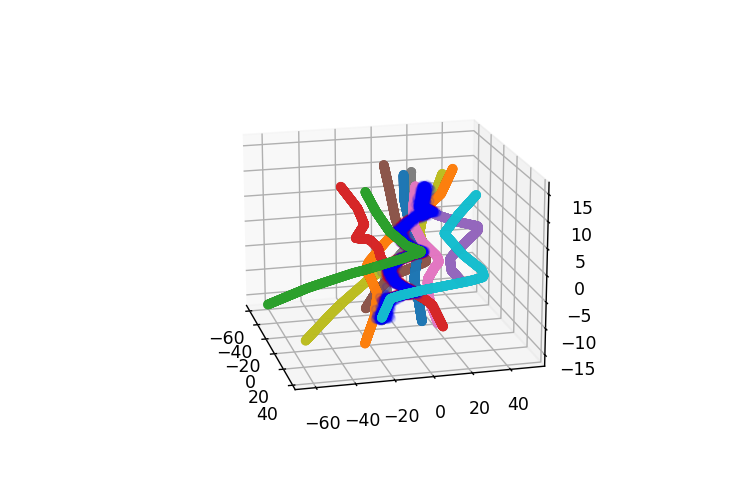

<IPython.core.display.Javascript object>


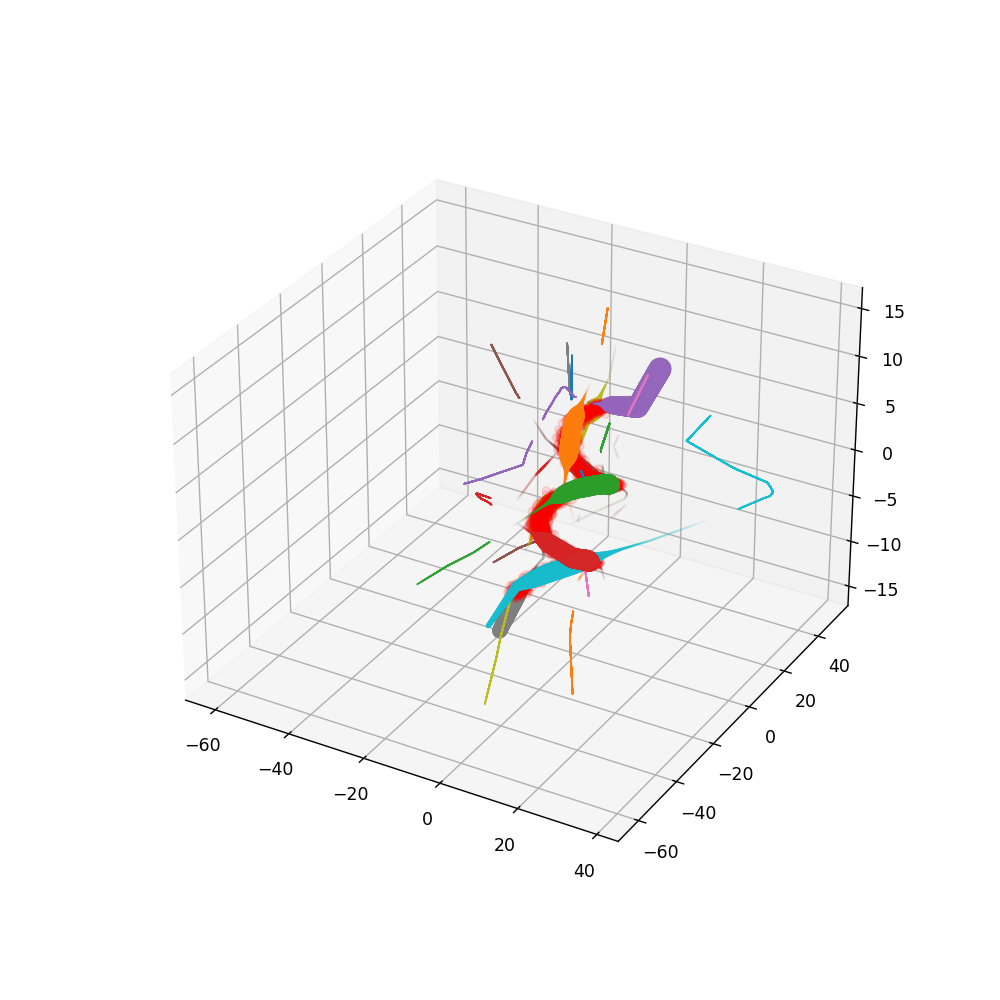

In [7]:
# =============================================
# GENERATE SAMPLES FROM PREDICTED DISTRIBUTIONS
# =============================================

y_samples = np.apply_along_axis(mdn.sample_from_output, 1, y_test, OUTPUT_DIMS, N_MIXES, temp=1.0, sigma_temp=1.0)

# Plot the samples
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
ax.scatter(y_samples.T[0], y_samples.T[1], x_test, alpha=0.1, c='b') #c=perf_down_sampled.moving
plt.show()

# Plot the means
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
ax.scatter(y_samples.T[0], y_samples.T[1], x_test, alpha=0.1, c='b') #c=perf_down_sampled.moving
for m in range(N_MIXES):
    one_pair = mus[m*OUTPUT_DIMS:(m+1)*OUTPUT_DIMS]
    ax.scatter(mus[:,2*m], mus[:,2*m + 1] , x_test, marker='o',alpha=0.3)
plt.show()

# Plot the weightings and variances
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
for m in range(N_MIXES):
    one_pair = mus[m*OUTPUT_DIMS:(m+1)*OUTPUT_DIMS]
    ax.scatter(mus[:,2*m], mus[:,2*m + 1] , x_test, s=100*sigs[:,2*m]*pis[:,m], marker='o',alpha=0.3)
plt.show()